   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2


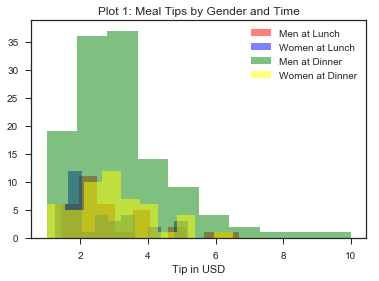

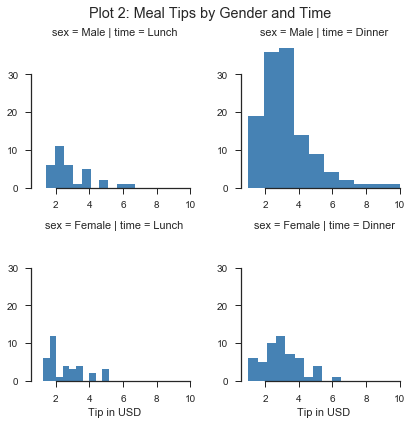

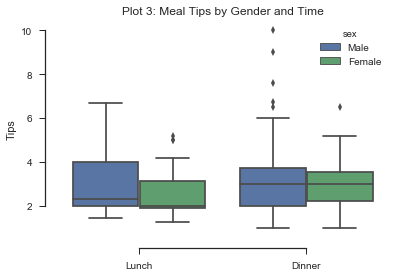

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Loading an example dataset provided by the seaborn package.
tips = sns.load_dataset("tips")
print(tips.head(n=4))

# Creating variables for each of the four conditions to graph using the basic
# matplotlib functionality.
menlunchtip = tips.loc[(tips['sex']=='Male')&(tips['time']=='Lunch'),'tip']
womenlunchtip = tips.loc[(tips['sex']=='Female')&(tips['time']=='Lunch'),'tip']
mendinnertip = tips.loc[(tips['sex']=='Male')&(tips['time']=='Dinner'),'tip']
womendinnertip = tips.loc[(tips['sex']=='Female')&(tips['time']=='Dinner'),'tip']

# Making overlapping histograms.
plt.hist(menlunchtip, color='red',  alpha=.5,label='Men at Lunch')  # alpha just controls the opacity
plt.hist(womenlunchtip, color='blue', alpha=.5,label='Women at Lunch')
plt.hist(mendinnertip, color='green', alpha=.5,label='Men at Dinner')  
plt.hist(womendinnertip, color='yellow', alpha=.5,label='Women at Dinner')
plt.xlabel('Tip in USD')
plt.legend(loc='upper right')
plt.title('Plot 1: Meal Tips by Gender and Time')
plt.show()

# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
g = sns.FacetGrid(tips, row="sex", col="time")
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "tip", color="steelblue",  lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
g.set_axis_labels('Tip in USD')
plt.suptitle('Plot 2: Meal Tips by Gender and Time')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

# Comparing groups using boxplots.
ax = sns.boxplot(x='time',y='tip',hue='sex',data=tips)  
plt.title('Plot 3: Meal Tips by Gender and Time')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')

plt.show()

### Bar Plot

Barplots are the most commonly used method for visualizing grouped data. Bar plots often show the mean (though they are also often used for counts), sometimes with an error bar representing some measure of variance. Below, we use the 95% confidence interval.

Barplots are also called 'dynamite plots' because each bar with its error resembles a stick of dynamite.

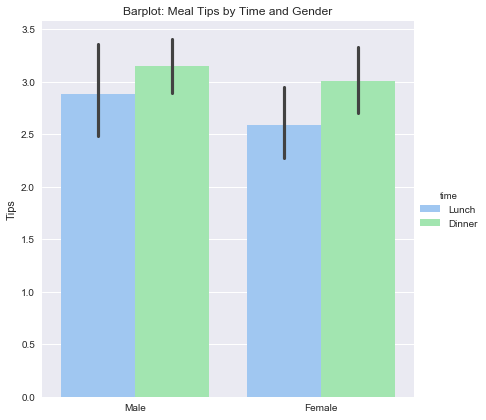

In [7]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")

g = sns.factorplot(x="sex", y="tip", hue="time", data=tips,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Tips")
g.set_xlabels("")
plt.title('Barplot: Meal Tips by Time and Gender')
plt.show()

Look at some [bad barplots in real life.](https://www.washingtonpost.com/graphics/politics/2016-election/trump-charts/)


### Pointplot

A pointplot has all the strengths of a barplot without many of its weaknesses.  Pointplots use much less space to convey the same information, and the difference in size between the groups is rightly compared to the size of the error bars.

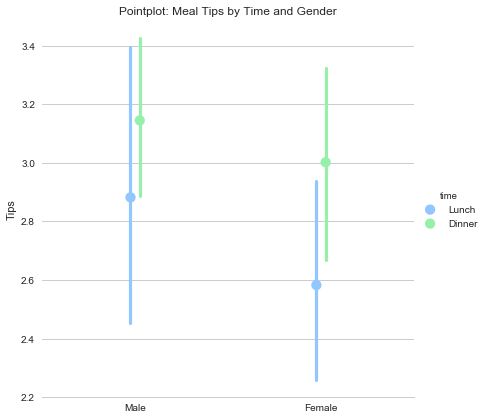

In [9]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")

g = sns.factorplot(x="sex", y="tip", hue="time", data=tips,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("Tips")
g.set_xlabels("")
plt.title('Pointplot: Meal Tips by Time and Gender')
plt.show()


## Visualizing Two Continuous Variables

So far, all these graphs have focused on one continuous variable, tips, and two categorical variables, gender and time.  Visualizing two continuous variables together involves a different type of plot.


### Scatterplot

Scatterplots are bread and butter for a data scientist.  They may appear with or without a 'fit' line that attempts to summarize the relationship between the variables.

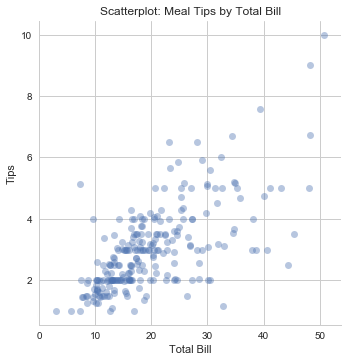

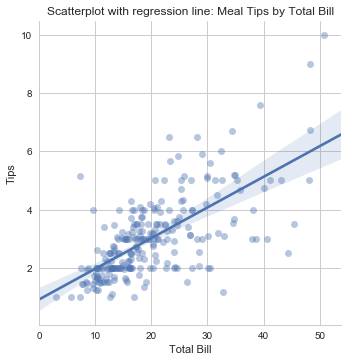

In [11]:
g = sns.lmplot(y='tip', # Variable 1.
               x='total_bill', # Variable 2.
               data=tips, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.title('Scatterplot: Meal Tips by Total Bill')
plt.show()

g = sns.lmplot(y='tip', 
               x='total_bill',
               data=tips, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.title('Scatterplot with regression line: Meal Tips by Total Bill')
plt.show()

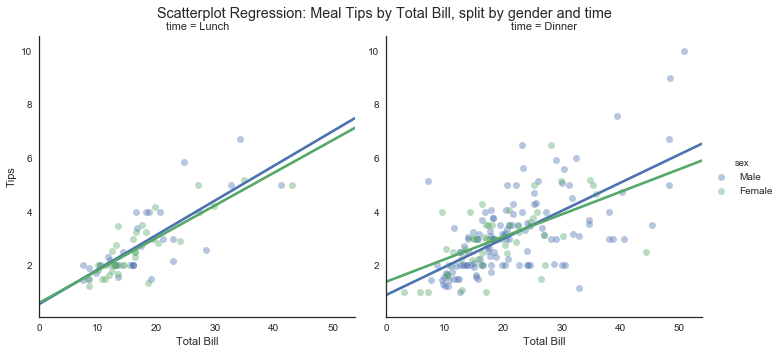

ImportError: No module named 'statsmodels'

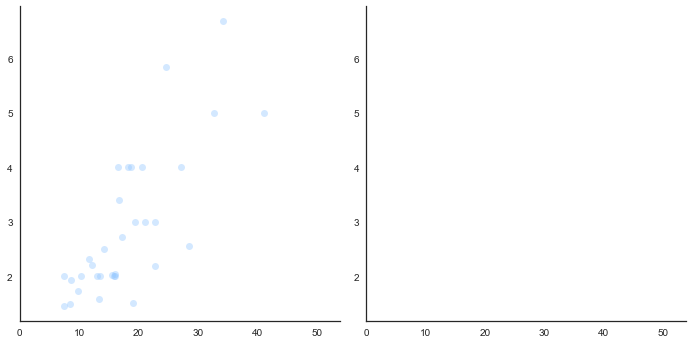

In [13]:
# Setting the overall aesthetic.
sns.set(style="white")

g = sns.lmplot(y='tip', 
               x='total_bill',
               hue='sex',
               data=tips, # Data.
               col='time',
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.suptitle('Scatterplot Regression: Meal Tips by Total Bill, split by gender and time')
plt.subplots_adjust(top=0.9)
plt.show()

g = sns.lmplot(y='tip', 
               x='total_bill',
               hue='time',
               data=tips, # Data.
               col='sex',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.suptitle('Scatterplot Lowess: Meal Tips by Total Bill, split by time and gender')
plt.subplots_adjust(top=0.9)
plt.show()